<a href="https://colab.research.google.com/github/juanivazquez/SdT/blob/main/Granger%26Newbold%5B1973%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **"Spurious Regressions in Econometrics"**

*by Granger & Newbold (1973)*

A Replication 




# 0 Settings

In [1]:
%load_ext rpy2.ipython
%%R
install.packages('fpp3')
library(fpp3)

In [29]:
# %%R
# str(allPackage <- installed.packages())
# allPackage [, c(1,3:5)]

# Lab



## Exp. N°0 : Level White Noise

In [12]:
%%R
set.seed(238)
t=50
n_exp = 100
exp_ls <- c()
pval_ls <- c()
r_sq_ls <- c()
for (j in 1:n_exp) {
  experimento <- tsibble(
                        obs = 1:t,
                        x = rnorm(t, mean = 0, sd = 1),
                        y = rnorm(t, mean = 0, sd = 1),
                        index = obs)

  ajuste <- experimento %>% model(tslm = TSLM(y ~ x ))

  pval = round(unname(unlist(glance(ajuste) %>% select(p_value))),3)
  r_sq = round(unname(unlist(glance(ajuste) %>% select(r_squared))),3)
  exp_ls <- append(exp_ls,j)
  pval_ls <- append(pval_ls,pval)
  r_sq_ls <- append(r_sq_ls,r_sq)
}

res_df = data.frame(exp=exp_ls,pvalues = pval_ls, rsquared = r_sq_ls)
res_df <-res_df[order(-res_df$pvalues),]
df_0 <- res_df

sum(res_df$pvalues < 0.05)/n_exp

[1] 0.05


## Exp. N°1 : Random Walk Level

In [18]:
%%R
set.seed(238)
t = 50
n_exp = 100
exp_ls <- c()
pval_ls <- c()
r_sq_ls <- c()

for (j in 1:n_exp) {
  experimento <- tsibble(
                        obs = 1:t,
                        x = cumsum(sample(c(-1,1), size=t, replace=TRUE)),
                        y = cumsum(sample(c(-1,1), size=t, replace=TRUE)),
                        index = obs)

  ajuste <- experimento %>%   model(tslm = TSLM(y ~ x ))
  pval = round(unname(unlist(glance(ajuste) %>% select(p_value))),3)
  r_sq = round(unname(unlist(glance(ajuste) %>% select(r_squared))),3)

  exp_ls <- append(exp_ls,j)
  pval_ls <- append(pval_ls,pval)
  r_sq_ls <- append(r_sq_ls,r_sq)
}

res_df = data.frame(exp=exp_ls,pvalues = pval_ls, rsquared = r_sq_ls)

res_df <-res_df[order(-res_df$pvalues),]
df_1 <- res_df
sum(res_df$pvalues < 0.05)/n_exp

[1] 0.67


## Exp. N°2 : Random Walk Change

In [17]:
%%R
set.seed(238)
t = 50
n_exp = 100
exp_ls <- c()
pval_ls <- c()
r_sq_ls <- c()

for (j in 1:n_exp) {
  experimento <- tsibble(
                        obs = 1:t,
                        x_level = cumsum(sample(c(-1,1), size=t, replace=TRUE)),
                        y_level = cumsum(sample(c(-1,1), size=t, replace=TRUE)),
                        index = obs)
  experimento$x <- c(NA, diff(experimento$x_level)) 
  experimento$y <- c(NA, diff(experimento$y_level)) 
  experimento   <- na.omit(experimento)
  ajuste <- experimento %>%   model(tslm = TSLM(y ~ x ))
  pval   <- round(unname(unlist(glance(ajuste) %>% select(p_value))),3)
  r_sq   <- round(unname(unlist(glance(ajuste) %>% select(r_squared))),3)

  exp_ls  <- append(exp_ls,j)
  pval_ls <- append(pval_ls,pval)
  r_sq_ls <- append(r_sq_ls,r_sq)
}

res_df = data.frame(exp=exp_ls,pvalues = pval_ls, rsquared = r_sq_ls)

res_df <-res_df[order(-res_df$pvalues),]

df_2 <- res_df

sum(res_df$pvalues < 0.05)/n_exp


[1] 0.03


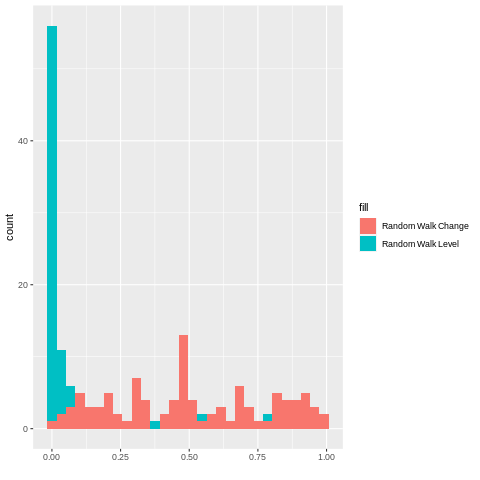

In [27]:
%%R
ggplot(df_2) + 
    #geom_histogram(aes(x = df_0$pvalues, fill = "White Noise Level")) + 
    geom_histogram(aes(x = df_1$pvalues, fill = "Random Walk Level")) + 
    geom_histogram(aes(x = df_2$pvalues, fill = "Random Walk Change")) + 
    labs(x = "");

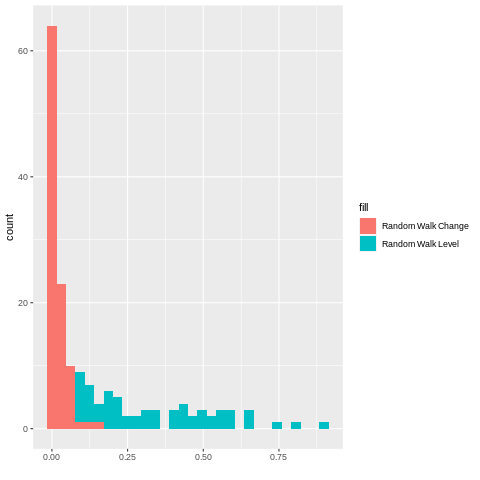

In [28]:
%%R
ggplot(df_2) + 
    #geom_histogram(aes(x = df_0$rsquared, fill = "White Noise Level")) + 
    geom_histogram(aes(x = df_1$rsquared, fill = "Random Walk Level")) + 
    geom_histogram(aes(x = df_2$rsquared, fill = "Random Walk Change")) + 
    labs(x = "")